# Project Title:Cyber Attack Severity Prediction and Risk Assessment System



# 1.Import Libraries 

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# 2. Load the Data set

In [3]:
import pandas as pd
file_path = "D:\\MachineLearning\\Global_Cybersecurity_Threats.csv"
df = pd.read_csv(file_path)

(df)


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [ ]:
#Observation:Dataset contains attack-related data for 3000 samples.

# 3.Exploratory Data Ananlysis

In [4]:
#checking for null values
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [ ]:
#OBSERVATION: The dataset doesn'thave any null values

In [20]:
#checking for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [ ]:
#OBSERVATION:The data set have integer,float and object data types

In [1]:
#checking for mean,median mode values
df.describe()
df.describe(include='All')

NameError: name 'df' is not defined

In [22]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

#  4.Create the Target Variable (Severity)

In [5]:
def derive_severity(value):
    if value['Financial Loss (in Million $)']> 60 or value['Number of Affected Users']>700000 or value['Incident Resolution Time (in Hours)']>60:
        return 'High'
    elif value['Financial Loss (in Million $)']> 30 or value['Number of Affected Users']>300000 or value['Incident Resolution Time (in Hours)']>30:
        return 'Medium'
    else:
        return 'Low'

df['Severity'] = df.apply(derive_severity, axis=1)
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours),Severity
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63,High
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71,High
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20,Medium
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7,Medium
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68,High
...,...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52,Medium
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26,High
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30,High
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9,Medium


In [31]:
#Observation:We have now a "Severity" column with classes: High, Medium, Low.

In [6]:
df['Severity'].value_counts()

Severity
High      1961
Medium     925
Low        114
Name: count, dtype: int64

# 5.Feature Engineering

In [7]:
# Label Encoding:  Converting Categorical columns into Numerical values
Categorical_col =['Country','Attack Type','Target Industry','Financial Loss (in Million $)','Attack Source', 'Security Vulnerability Type','Defense Mechanism Used']
le=LabelEncoder()
for col in Categorical_col:
    df[col]=le.fit_transform(df[col])

# Encoding Target variable (Severity)
df['Severity'] = le.fit_transform(df['Severity'])  # Low=1, Medium=2, High=0

df
    

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours),Severity
0,2,2019,3,1,2039,773169,0,1,4,63,0
1,2,2019,4,5,1546,295961,0,1,3,71,0
2,5,2017,2,4,964,605895,0,2,4,20,2
3,8,2024,4,6,1035,659320,2,0,0,7,2
4,4,2018,2,4,1876,810682,1,0,4,68,0
...,...,...,...,...,...,...,...,...,...,...,...
2995,8,2021,4,2,1277,190694,3,0,3,52,2
2996,1,2023,5,6,742,892843,0,3,4,26,0
2997,1,2017,5,4,810,734737,2,2,0,30,0
2998,8,2022,5,4,787,379954,1,1,3,9,2


In [ ]:
#Observation: Now all the columns are in numerical form

# 6.Outlier detection

In [8]:
import numpy as np
Q1,Q3=np.percentile(df['Financial Loss (in Million $)'],(25,75))
IQR=Q3-Q1
IQR

1272.25

In [9]:
LowerBound=Q1-1.5*IQR
UpperBound=Q3+1.5*IQR
print(f'LowerBound Value:{LowerBound}')
print(f'UpperBound Value:{UpperBound}')

LowerBound Value:-1276.625
UpperBound Value:3812.375


In [19]:
#filtering the outliers
Outliers=df[(df['Financial Loss (in Million $)'] < LowerBound) | (df['Financial Loss (in Million $)']> UpperBound)]
print(f'The outliers are:{Outliers}')

The outliers are:Empty DataFrame
Columns: [Country, Year, Attack Type, Target Industry, Financial Loss (in Million $), Number of Affected Users, Attack Source, Security Vulnerability Type, Defense Mechanism Used, Incident Resolution Time (in Hours), Severity]
Index: []


In [ ]:
#Observation:There are no outliers 

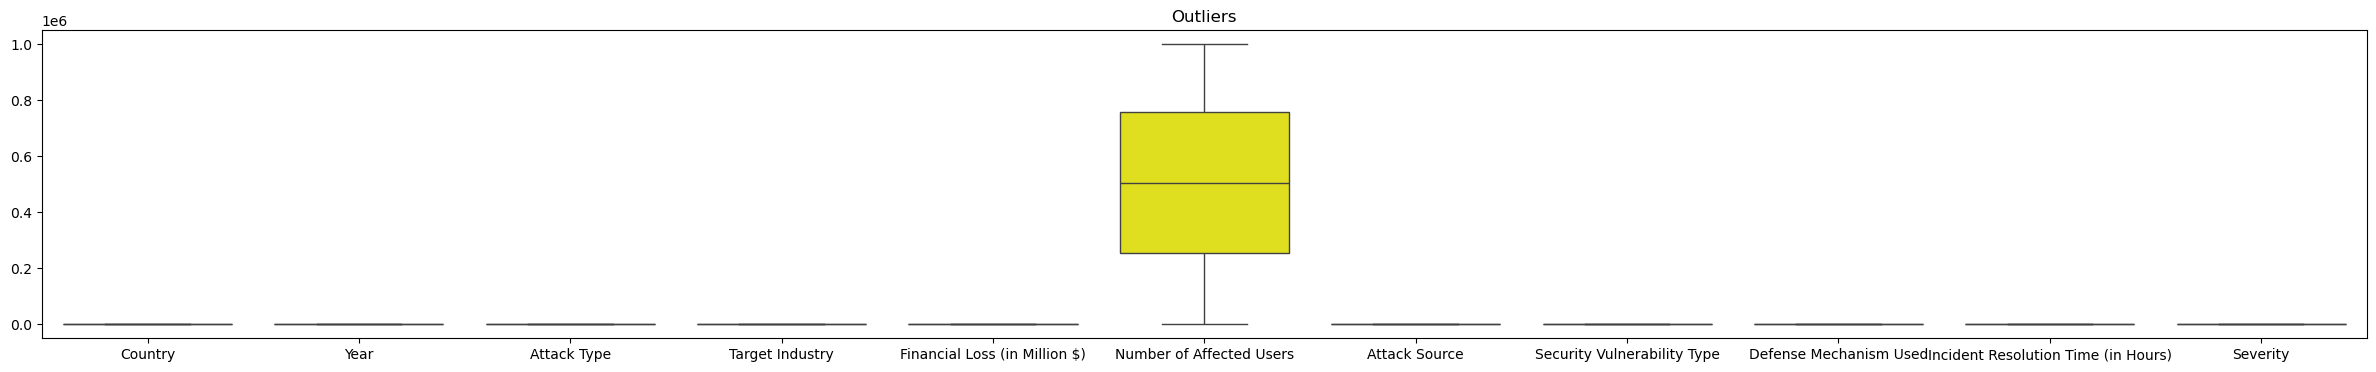

In [33]:
#Box Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,4))
sns.boxplot(data=df,color='Yellow')
plt.title("Outliers")
plt.show()


In [ ]:
#Observations: Visualising that there are no outliers in the dataframe, and the data is clean

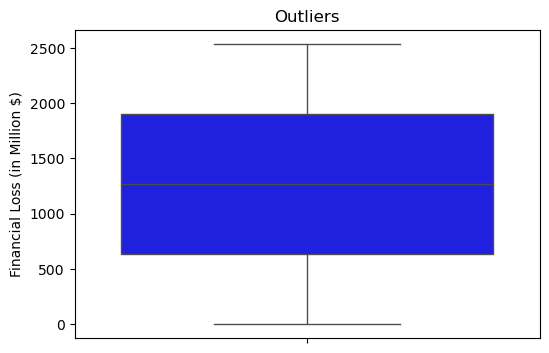

In [34]:
#Box Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.boxplot(data=df['Financial Loss (in Million $)'],color='blue')
plt.title("Outliers")
plt.show()

In [35]:

numeric_features=['']
Q1,Q3=np.percentile(df,(25,75))
IQR=Q3-Q1
IQR

628.25

In [36]:
LowerBound=Q1-1.5*IQR
UpperBound=Q3+1.5*IQR
print(f'LowerBound Value:{LowerBound}')
print(f'UpperBound Value:{UpperBound}')

LowerBound Value:-941.375
UpperBound Value:1571.625


In [41]:
Outliers=df[(df < LowerBound) | (df > UpperBound)]
print(f'The outliers are:\n{Outliers}')

The outliers are:
      Country  Year  Attack Type  Target Industry  \
0         NaN  2019          NaN              NaN   
1         NaN  2019          NaN              NaN   
2         NaN  2017          NaN              NaN   
3         NaN  2024          NaN              NaN   
4         NaN  2018          NaN              NaN   
...       ...   ...          ...              ...   
2995      NaN  2021          NaN              NaN   
2996      NaN  2023          NaN              NaN   
2997      NaN  2017          NaN              NaN   
2998      NaN  2022          NaN              NaN   
2999      NaN  2021          NaN              NaN   

      Financial Loss (in Million $)  Number of Affected Users  Attack Source  \
0                            2039.0                  773169.0            NaN   
1                               NaN                  295961.0            NaN   
2                               NaN                  605895.0            NaN   
3                        

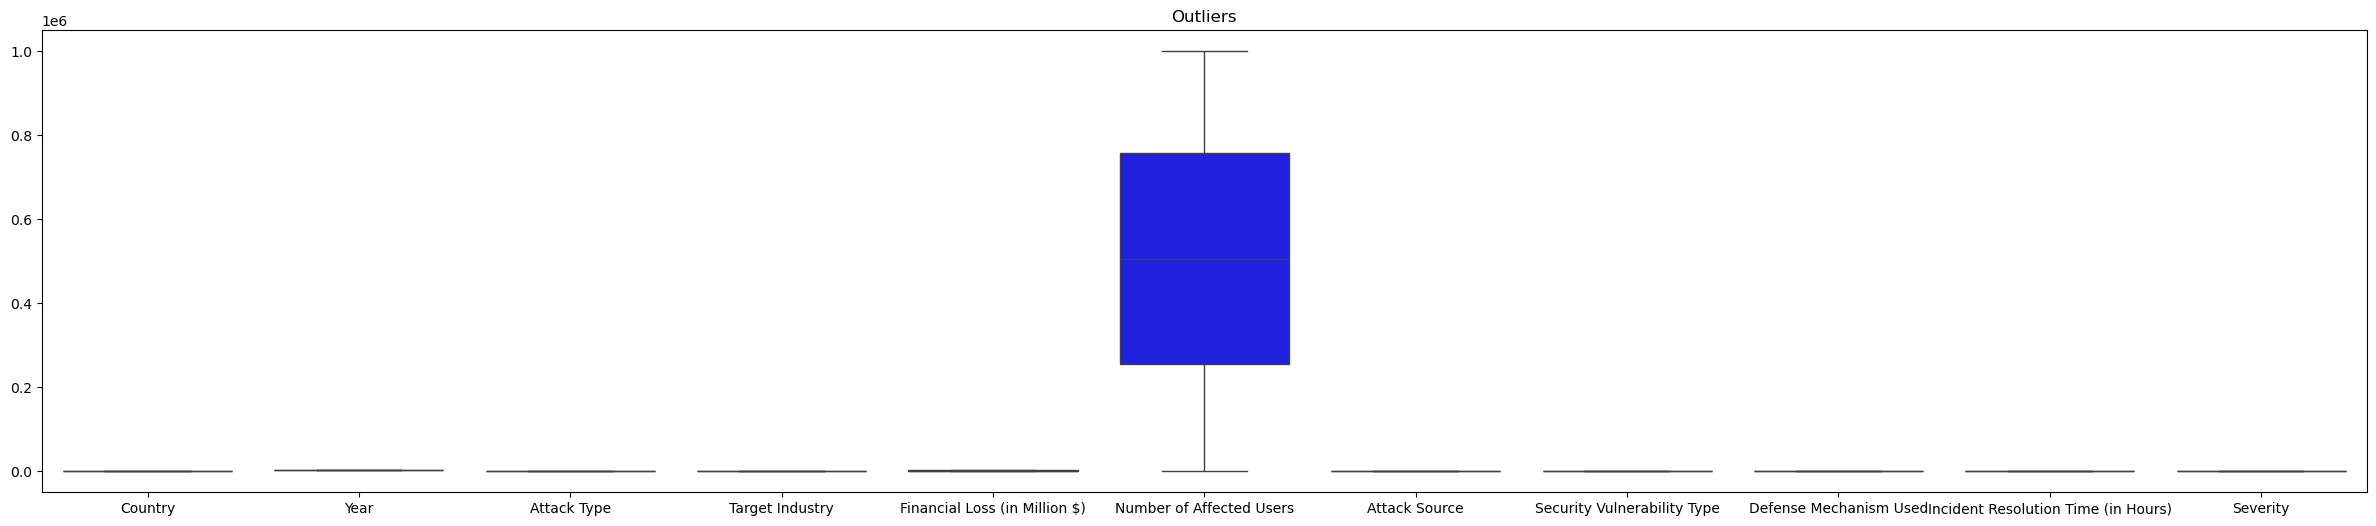

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,6))
sns.boxplot(data=df,color='blue')
plt.title("Outliers")
plt.show()

# 7.Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
features  =['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']
X=Scaler.fit_transform(df[features])
y=df['Severity']

In [ ]:
#Observation:All features are having mean=0 and standard deviation =1 ,all features are having same magnitude

# 7.Splitting the data

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Observation: Data split into training (80%) and testing (20%).

# 8.Training the data

In [43]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

# 9.Predict the model

In [50]:
y_pred=RF.predict(X_test)

# 9.Model Evaluation


In [56]:

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Confusion Matrix
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')



Model Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      0.92      0.96        25
           2       0.99      1.00      0.99       177

    accuracy                           1.00       600
   macro avg       1.00      0.97      0.98       600
weighted avg       1.00      1.00      1.00       600

Confusion Matrix:
[[398   0   0]
 [  0  23   2]
 [  0   0 177]]


In [ ]:
#Observation:Model Accuracy is 100%